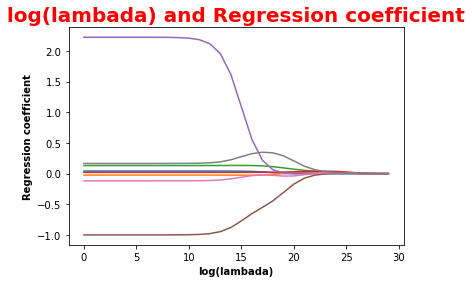

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return np.mat(xArr), np.mat(yArr).T

def ridgeRegres(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("矩阵为奇异矩阵,不能转置")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xMat, yMat):
    # 标准化处理
    yMat = yMat - np.mean(yMat, axis=0)
    xMat_var = np.var(xMat, axis=0)
    xMat = (xMat-np.mean(xMat, axis=0)) / xMat_var
    numTestPts = 30                                        #30个不同的lambda测试
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))       #初始回归系数矩阵
    for i in range(numTestPts):                            #改变lambda计算回归系数
        ws = ridgeRegres(xMat, yMat, np.exp(i-10))         #lambda以e的指数变化
        wMat[i, :] = ws.T                                  #计算回归系数矩阵
    return wMat

def plotwMat():
    X_train, y_train = loadDataSet('dataSet_04.txt')
    redgeWeights = ridgeTest(X_train, y_train)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(redgeWeights)    
    ax_title_text = ax.set_title(u'log(lambada) and Regression coefficient')
    ax_xlabel_text = ax.set_xlabel(u'log(lambada)')
    ax_ylabel_text = ax.set_ylabel(u'Regression coefficient')
    plt.setp(ax_title_text, size = 20, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()

if __name__ == '__main__':
    plotwMat()

前向逐步线性回归, 很朴素的思想

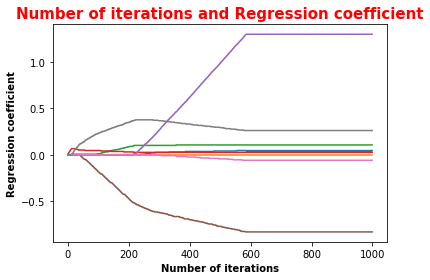

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

def regularize(xMat, yMat):
    inxMat = xMat.copy()
    inyMat = yMat.copy()
    yMean = np.mean(yMat, 0)                                                         #行与行操作，求均值
    inyMat = yMat - yMean                                                            #数据减去均值
    inMeans = np.mean(inxMat, 0)                                                     #行与行操作，求均值
    inVar = np.var(inxMat, 0)                                                        #行与行操作，求方差
    inxMat = (inxMat - inMeans) / inVar                                              #数据减去均值除以方差实现标准化
    return inxMat, inyMat

def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    xMat, yMat = regularize(xMat, yMat)
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))                                                 #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                                                            #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        lowestError = float('inf');                                                   #正无穷
        for j in range(n):                                                            #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign                                               #微调回归系数
                yTest = xMat * wsTest                                                 #计算预测值
                rssE = rssError(yMat.A, yTest.A)                                      #计算平方误差
                if rssE < lowestError:                                                #如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T                                                         #记录numIt次迭代的回归系数矩阵
    return returnMat

def plotstageWiseMat():
    xArr, yArr = loadDataSet('dataSet_04.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)    
    ax_title_text = ax.set_title(u'Number of iterations and Regression coefficient')
    ax_xlabel_text = ax.set_xlabel(u'Number of iterations')
    ax_ylabel_text = ax.set_ylabel(u'Regression coefficient')
    plt.setp(ax_title_text, size = 15, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()

if __name__ == '__main__':
    plotstageWiseMat()

In [3]:
import numpy as np
from os import listdir

def img2vector(directory, filename):
    vector1 = np.zeros((1, 1024))
    vector2 = np.zeros((1, 256))
    data = np.zeros((32, 32))
    f = open(directory + '/' + filename)
    for i in range(32):
        line = f.readline()
        for j in range(32):
            data[i, j] = int(line[j])
            vector1[0, 32*i+j] = int(line[j])
    for i in range(0, 32, 2):
        for j in range(0, 32, 2):
            vector2[0, int(i*8+j/2)] = data[i][j]+data[i][j+1]+data[i+1][j]+data[i+1][j+1]
    return vector1, vector2

def getData(filename):
    fileList = listdir(filename)
    m = len(fileList)
    dataset = np.zeros((m, 1024))
    dataset_DR = np.zeros((m, 256))
    labels = []
    for i in range(m):
        labels.append(int(fileList[i].split('_')[0]))
        dataset[i], dataset_DR[i] = img2vector(filename, fileList[i])
    return dataset, dataset_DR, labels

X_train, X_train_DR, y_train = getData('trainingDigits')
X_test, X_test_DR, y_test = getData('testDigits')

In [15]:
from sklearn.linear_model import Ridge
np.set_printoptions(threshold=np.inf)

if __name__ == '__main__':
    reg = Ridge(alpha = 100)
    reg = reg.fit(X_train, y_train)
    y_predict = []
    i = 0
    y_predict = reg.predict(X_test).tolist()
    for y1, y2 in zip(y_predict, y_test):
        if y1 < y2+1 and y1 > y2-1:
            i += 1
    print(i/len(y_test))

0.452431289640592
